# Network Based Model

<ul>
<li>In a network based model, nodes represent words and edges represent their semantic relationships.
        <ul><li><small> <i>Fish</i> is connected to <i>Animal</i> by <i>is-a</i> link.</small></li></ul>

<li>Individual nodes in the network are activated, which in turn leads to activation of neighbouring nodes and network is traversed till the desired node is reached.

<li>Graph Theoretical and Network Science approch has led to significant traction in network based models.

<li>Usually Large Scale Databases are used to contruct the networks and capture the large-scale relationships between words. Roget's Thesaurus and WordNet are examples of such databases.
</ul>

In this notebook we will see a simple implementation of an Associated Network Model that implements the original network suggested by Collins and Quillian

### Import NetworkX library to create the network model

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

### Create a Directional Graph Network for our nodes

In [46]:
semantic_memory = nx.DiGraph()
semantic_memory

### Define the Concepts/Words and the Attributes that it holds

`concepts` is a list of words and their `Attributes`

In [47]:
concepts = [
    ('Animal', {"Attributes": ['has skin', 'can breathe', 'can eat', 'can move']}),
    ('Bird', {'Attributes':['has wings','can fly', 'has feathers']}),
    ('Fish', {'Attributes':['has fins','can swim', 'has gills']}),
    ('Canary', {'Attributes':['is yellow','can sing']}),
    ('Ostrich', {'Attributes':['is tall','cannot fly', 'has long legs']}),
    ('Shark', {'Attributes':['is dangerous','can bite']}),
    ('Salmon', {'Attributes':['is edible','is pink']}),
]

### Create Associations between the above concepts.

`associations` holds the edges of the graph. Each edge has a `Relation` associated with it. Here it is the `is a` relation

In [48]:
associations = [
    ('Bird', 'Animal', {'Relation': 'is a'}),
    ('Fish', 'Animal', {'Relation': 'is a'}),
    ('Canary', 'Bird', {'Relation': 'is a'}),
    ('Ostrich', 'Bird', {'Relation': 'is a'}),
    ('Shark', 'Fish', {'Relation': 'is a'}),
    ('Salmon', 'Fish', {'Relation': 'is a'}),
]

### Add the Nodes and the Edges from `concepts` and `associations` into the graph

In [49]:
semantic_memory.add_nodes_from(concepts)
semantic_memory.add_edges_from(associations)

### Layout the positions of the nodes for plotting.

Here we use the `spring_layout` inorder for the graph to layout the graph in an tight fashion.
It uses the Fruchterman-Reingold force-directed algorithm to position the nodes.
The edges act as springs and the nodes as weights and it finds the equilibrium condition for proper positioning.

`initial_pos` is used to give approximate positions we want the nodes to take. Else the nodes will take random positions and a `seed` can be provided in order to get the same positioning always.

In [50]:
initial_pos = {
    'Animal': [0, 1],
    'Bird': [-0.5, 0.5],
    'Fish': [0.5,  0.5],
    'Canary': [ -0.75, 0],
    'Ostrich': [-0.25, 0],
    'Shark': [0.25, 0],
    'Salmon': [0.75, 0]
}
pos = nx.spring_layout(semantic_memory, pos=initial_pos)
pos

{'Animal': array([1.78362841e-18, 1.00000000e+00]),
 'Bird': array([-0.35713237,  0.31604856]),
 'Fish': array([0.35713237, 0.31604856]),
 'Canary': array([-0.9764321 , -0.37679961]),
 'Ostrich': array([-0.48268471, -0.43924895]),
 'Shark': array([ 0.48268471, -0.43924895]),
 'Salmon': array([ 0.9764321 , -0.37679961])}

### Create labels for the nodes with their attributes

In [51]:
labels = {
    node:f"{node} \n{semantic_memory.nodes[node].get('Attributes')}" for node in semantic_memory.nodes
}
labels

{'Animal': "Animal \n['has skin', 'can breathe', 'can eat', 'can move']",
 'Bird': "Bird \n['has wings', 'can fly', 'has feathers']",
 'Fish': "Fish \n['has fins', 'can swim', 'has gills']",
 'Canary': "Canary \n['is yellow', 'can sing']",
 'Ostrich': "Ostrich \n['is tall', 'cannot fly', 'has long legs']",
 'Shark': "Shark \n['is dangerous', 'can bite']",
 'Salmon': "Salmon \n['is edible', 'is pink']"}

### Create labels for the edges with their relationships

In [52]:
edge_labels = {
    (u, v): d['Relation'] for u, v, d in semantic_memory.edges(data=True)
}
edge_labels

{('Bird', 'Animal'): 'is a',
 ('Fish', 'Animal'): 'is a',
 ('Canary', 'Bird'): 'is a',
 ('Ostrich', 'Bird'): 'is a',
 ('Shark', 'Fish'): 'is a',
 ('Salmon', 'Fish'): 'is a'}

### Plot the network graph using the `nx.draw` function.

`nx.draw` is based on the `matplotlib` library and thus is required to have an axis given to it.

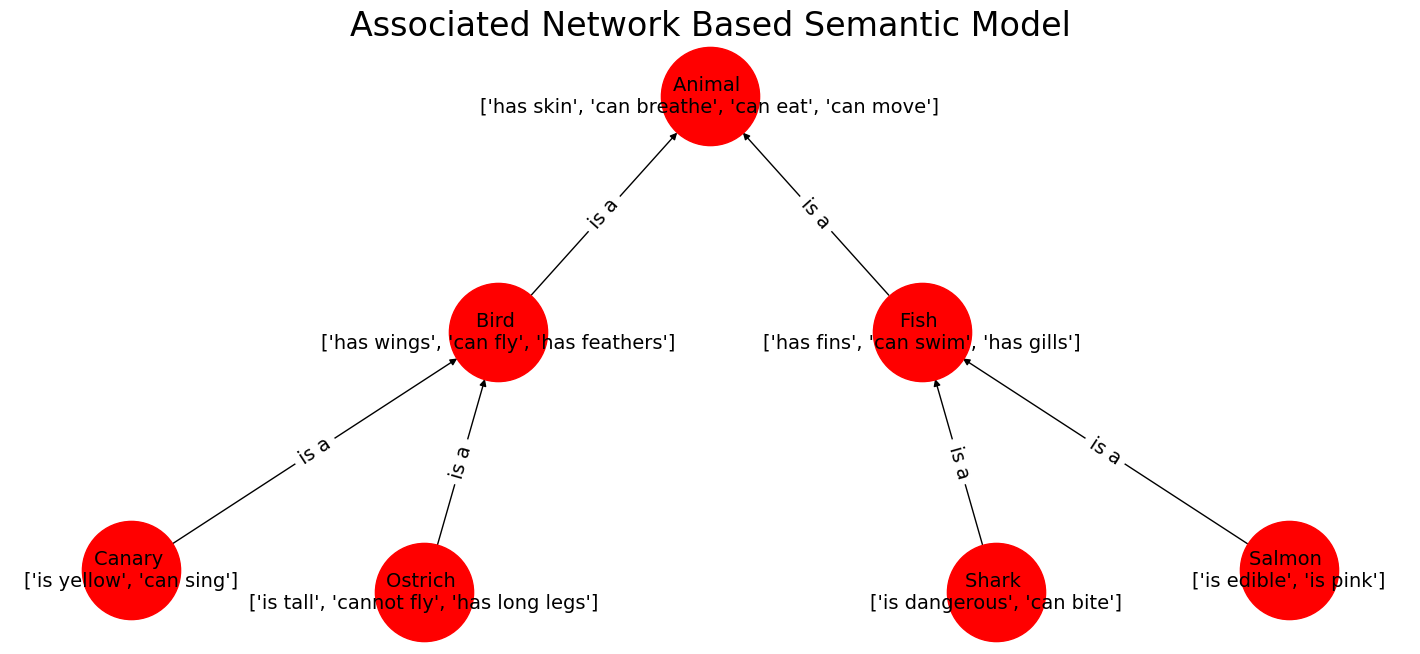

In [53]:
fig = plt.figure(figsize=[14, 6])
ax = fig.add_axes([0,0,1,1])
nx.draw(semantic_memory, pos, ax, with_labels=True, labels=labels, node_color='red', font_size=14, node_size=5000)
nx.draw_networkx_edge_labels(semantic_memory, pos, edge_labels, font_size=14)
plt.title('Associated Network Based Semantic Model', fontsize=24)
plt.show()


In [54]:
def get_all_successors(node):
    obj = node
    successors = [obj]

    while len(list(semantic_memory.successors(obj))) != 0:
        obj = list(semantic_memory.successors(obj))[0]
        successors.append(obj)
    
    return successors

In [55]:
def get_attributes(node):
        
    successors = get_all_successors(node)
    atrributes = []
    for successor in successors:
        for attr in semantic_memory.nodes[successor]['Attributes']:
            atrributes.append(attr)
            
    return atrributes

## Examples

In [56]:
print('Attributes of Shark: ', get_attributes('Shark'))

Attributes of Shark:  ['is dangerous', 'can bite', 'has fins', 'can swim', 'has gills', 'has skin', 'can breathe', 'can eat', 'can move']


In [57]:
def is_a_relation(u, v):
    return (v in get_all_successors(u))

In [58]:
print('Is "Shark" a "Bird": ', is_a_relation('Shark', 'Bird'))

Is "Shark" a "Bird":  False


In [59]:
print('Can "Shark" fly?', 'can fly' in get_attributes('Shark'))

Can "Shark" fly? False


### Quantifying the Similarities between words

Here we use a simple path similarity such that it checks how common is the path that both the concepts have

The path similarity is calculated as per the number of nodes connected with these nodes.

$S(A,B) = \frac {|N(A) \cap N(B)|}{max(|N(A)|, |N(B)|)}$, where $N(A)$ and $N(B)$ are the set of successor nodes.

In [79]:
def path_similarity(A, B):
    successors1 = set(get_all_successors(A))
    successors2 = set(get_all_successors(B))
    common_successors = successors1.intersection(successors2)
    
    if A == B:
        return 1.0

    if common_successors:
        similarity = round(len(common_successors) / max(len(get_all_successors(A)), len(get_all_successors(B))), 3)
    else:
        similarity = 0.0
    
    return similarity



In [80]:
similarities  = {(u, v):path_similarity(u, v) for u in semantic_memory.nodes for v in semantic_memory.nodes}
similarities

{('Animal', 'Animal'): 1.0,
 ('Animal', 'Bird'): 0.5,
 ('Animal', 'Fish'): 0.5,
 ('Animal', 'Canary'): 0.333,
 ('Animal', 'Ostrich'): 0.333,
 ('Animal', 'Shark'): 0.333,
 ('Animal', 'Salmon'): 0.333,
 ('Bird', 'Animal'): 0.5,
 ('Bird', 'Bird'): 1.0,
 ('Bird', 'Fish'): 0.5,
 ('Bird', 'Canary'): 0.667,
 ('Bird', 'Ostrich'): 0.667,
 ('Bird', 'Shark'): 0.333,
 ('Bird', 'Salmon'): 0.333,
 ('Fish', 'Animal'): 0.5,
 ('Fish', 'Bird'): 0.5,
 ('Fish', 'Fish'): 1.0,
 ('Fish', 'Canary'): 0.333,
 ('Fish', 'Ostrich'): 0.333,
 ('Fish', 'Shark'): 0.667,
 ('Fish', 'Salmon'): 0.667,
 ('Canary', 'Animal'): 0.333,
 ('Canary', 'Bird'): 0.667,
 ('Canary', 'Fish'): 0.333,
 ('Canary', 'Canary'): 1.0,
 ('Canary', 'Ostrich'): 0.667,
 ('Canary', 'Shark'): 0.333,
 ('Canary', 'Salmon'): 0.333,
 ('Ostrich', 'Animal'): 0.333,
 ('Ostrich', 'Bird'): 0.667,
 ('Ostrich', 'Fish'): 0.333,
 ('Ostrich', 'Canary'): 0.667,
 ('Ostrich', 'Ostrich'): 1.0,
 ('Ostrich', 'Shark'): 0.333,
 ('Ostrich', 'Salmon'): 0.333,
 ('Shark', 'A